In [1]:
import numpy as np 
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy as cp
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
file= "weather_classification_data.csv"
df= pd.read_csv(file) 
df = pd.DataFrame(df)

In [7]:
df.head() # show 5 hàng đầu tiên trong data


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## 1. Tiền xử lí

In [8]:
#df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df.describe()
'''
số giá trị
giá trị trung bình
độ lệch chuẩn
tối thiểu
phân vị thứ 25
phân vị thứ 50 
phân vị thứ 75
tối đa
'''

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [10]:
df.duplicated().sum() # tổng số hàng trùn lặp

0

In [11]:
df.isnull().sum() # tổng các giá trị rỗng

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [21]:
wt_cnt = df['Weather Type'].value_counts() # đếm các loại giá trị trong cột
tt_cnt = wt_cnt.sum()
print(wt_cnt)
print(tt_cnt)

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
13200


C:\Users\Windows\AppData\Local\Temp\ipykernel_8784\1462158027.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df, palette=colors)
C:\Users\Windows\AppData\Local\Temp\ipykernel_8784\1462158027.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Weather Type', data=df, palette=colors)


,Count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


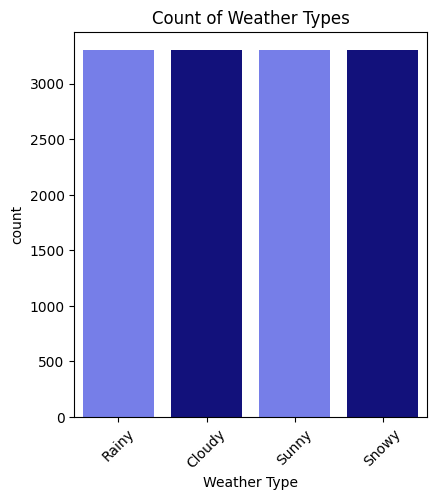

In [26]:
#Thống kê
# Thiết lập kiểu và màu sắc của biểu đồ
plt.figure(figsize=(10, 5))  
colors = ['#636efb', '#01008c']  

# Tạo biểu đồ cột cho 'Weather Type' 
plt.subplot(1, 2, 1)  
sns.countplot(x='Weather Type', data=df, palette=colors) 
plt.title('Count of Weather Types')  
plt.xticks(rotation=45)  

# Đếm số lần xuất hiện của từng loại thời tiết
weather_counts = df['Weather Type'].value_counts() 
total_count = weather_counts.sum() 

# Hiển thị số đếm dưới dạng DataFrame
weather_counts_df = pd.DataFrame({'Weather Type': weather_counts.index, 'Count': weather_counts.values})
weather_counts_df.set_index('Weather Type', inplace=True)  
weather_counts_df

0
Axes(0.125,0.677368;0.168478x0.202632)
1
Axes(0.327174,0.677368;0.168478x0.202632)
2
Axes(0.529348,0.677368;0.168478x0.202632)
3
Axes(0.731522,0.677368;0.168478x0.202632)
4
Axes(0.125,0.393684;0.168478x0.202632)
5
Axes(0.327174,0.393684;0.168478x0.202632)
6
Axes(0.529348,0.393684;0.168478x0.202632)


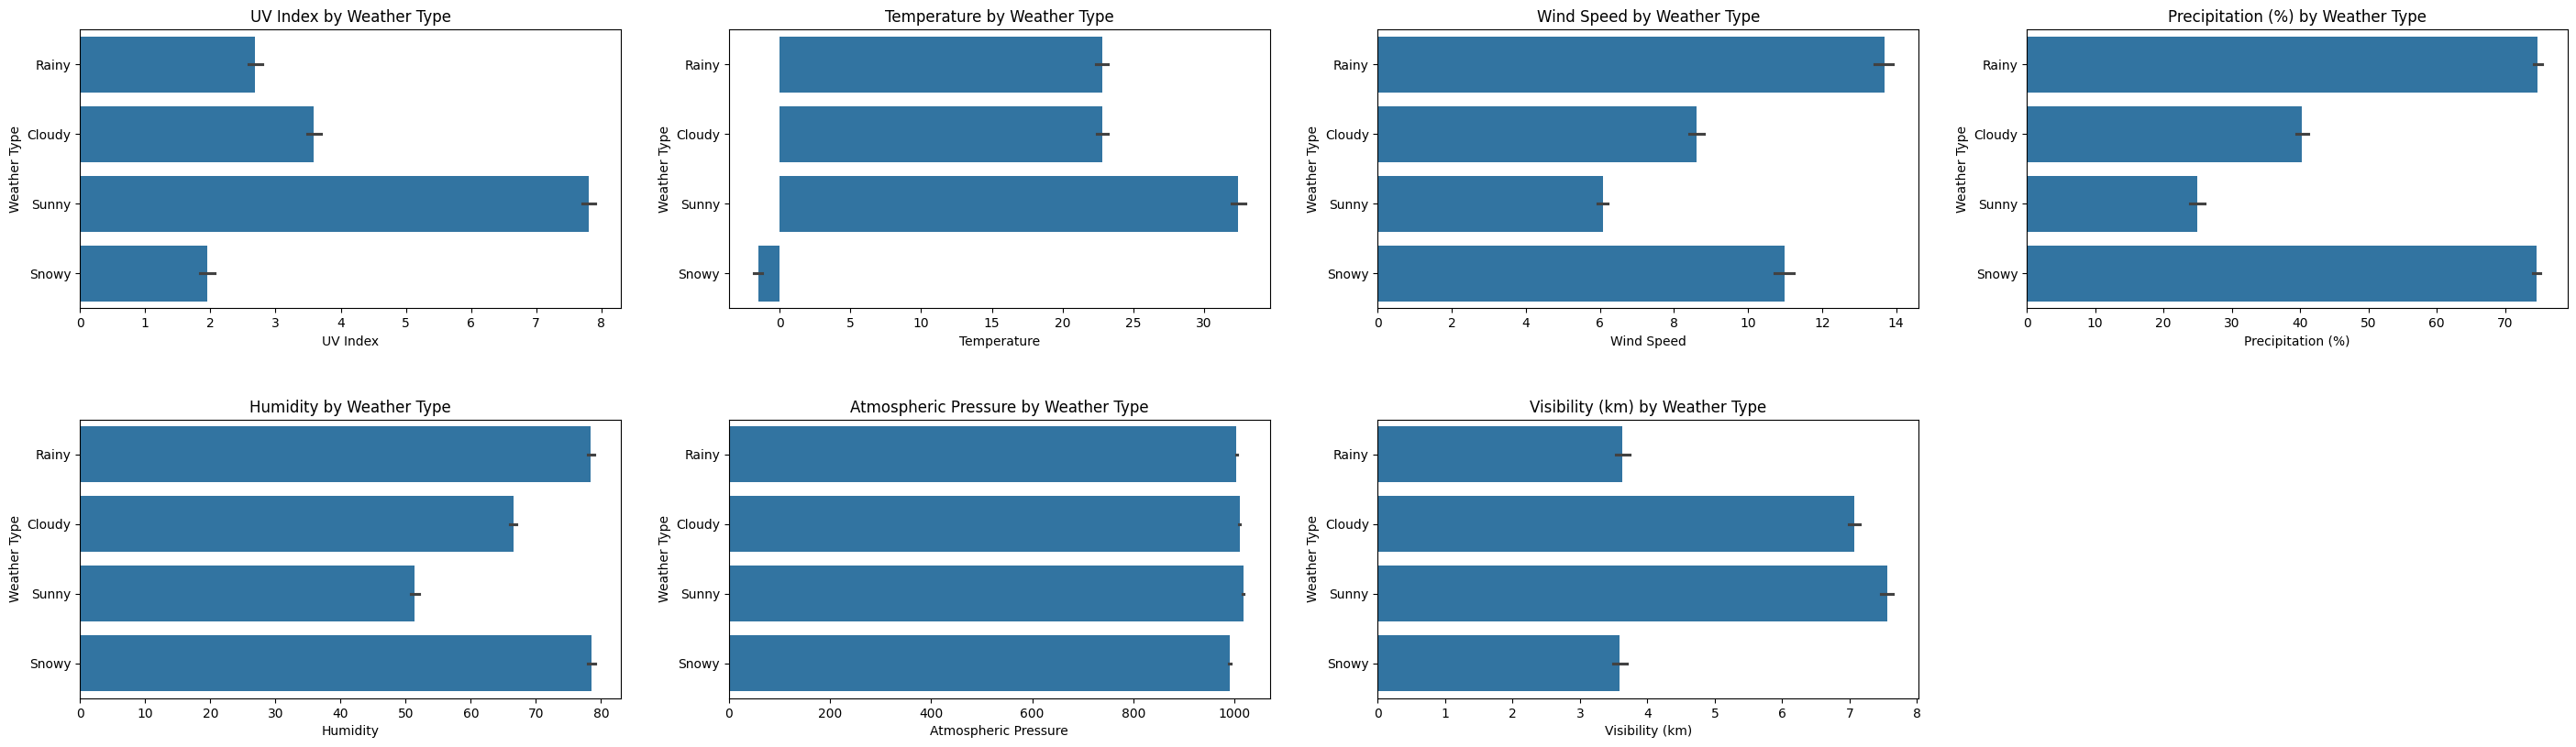

In [32]:
# Thiết lập các subplot
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(35, 15))  
fig.subplots_adjust(hspace=0.4)  

# Danh sách các cột để vẽ biểu đồ 
columns = ["UV Index", "Temperature", "Wind Speed", "Precipitation (%)", "Humidity",  
           "Atmospheric Pressure", "Visibility (km)"]  

# Tạo biểu đồ thanh cho mỗi cột so với 'Season'
for i, column in enumerate(columns):  
    row, col = divmod(i, 4)  # trả về 1 cặp giá trị (chia nguyên, số dư)
    print(i)
    sb.barplot(data=df, x=column, y="Weather Type", ax=ax[row][col], width=0.8)  
    print(ax[row][col])
    ax[row][col].set_title(f'{column} by Weather Type')  

# Ẩn bất kỳ subplot nào không sử dụng
for j in range(len(columns), 12):  
    row, col = divmod(j, 4) 
    fig.delaxes(ax[row][col])  

In [31]:
Le = LabelEncoder()
df['Cloud Cover_cat'] = Le.fit_transform(df['Cloud Cover'])
df['Season_cat'] = Le.fit_transform(df['Season'])
df['Location_cat'] = Le.fit_transform(df['Location'])
df['Weather Type_cat'] = Le.fit_transform(df['Weather Type'])

In [33]:
df = df[["UV Index", "Temperature", "Wind Speed", "Precipitation (%)", "Humidity",  
           "Atmospheric Pressure", "Visibility (km)",'Cloud Cover_cat', 'Season_cat', 'Location_cat','Weather Type_cat']]

In [34]:
df.head()

,UV Index,Temperature,Wind Speed,Precipitation (%),Humidity,Atmospheric Pressure,Visibility (km),Cloud Cover_cat,Season_cat,Location_cat,Weather Type_cat
0,2,14.0,9.5,82.0,73,1010.82,3.5,3,3,1,1
1,7,39.0,8.5,71.0,96,1011.43,10.0,3,1,1,0
2,5,30.0,7.0,16.0,64,1018.72,5.5,0,1,2,3
3,7,38.0,1.5,82.0,83,1026.25,1.0,0,1,0,3
4,1,27.0,17.0,66.0,74,990.67,2.5,2,3,2,1


In [17]:
# Giả sử bạn có một DataFrame df
X = df.drop(columns=['Weather Type_cat'])  # Dữ liệu đầu vào
y = df['Weather Type_cat']  # Nhãn

# Chia thành training và temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Chia tiếp temp thành validation và test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [18]:

from sklearn.tree import DecisionTreeClassifier
# Khởi tạo mô hình DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình với tập training
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Đánh giá hiệu suất
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))


Validation Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       495
           1       0.88      0.89      0.89       477
           2       0.93      0.92      0.92       521
           3       0.89      0.89      0.89       487

    accuracy                           0.90      1980
   macro avg       0.89      0.90      0.90      1980
weighted avg       0.90      0.90      0.90      1980



In [20]:
# Dự đoán trên tập test
y_test_pred = model.predict(X_test)

# Đánh giá hiệu suất
print("Test Performance:")
print(classification_report(y_test, y_test_pred))


Test Performance:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       460
           1       0.91      0.90      0.91       505
           2       0.94      0.95      0.94       512
           3       0.90      0.92      0.91       503

    accuracy                           0.91      1980
   macro avg       0.91      0.91      0.91      1980
weighted avg       0.91      0.91      0.91      1980



In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy for RandomForest: {:.6f}".format(accuracy_score(y_val, y_val_pred)))

Accuracy for RandomForest: 0.895455


In [22]:
print("Accuracy for RandomForest: {:.6f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy for RandomForest: 0.910606
